# Lending Club Fraud Analytics

You are employed for a consumer finance business that specialises in providing different kinds of loans to urban customers. Upon receiving a loan application, the business must decide whether to approve the loan based on the applicant's profile. The bank's choice is subject to two different kinds of risks:

 - If the borrower is likely to repay the loan, refusing to grant it results in the company losing business.
 - If the borrower is unlikely to pay back the loan, or is likely to default, authorising the loan could result in a loss for the business.


### When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

    - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

    - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

    - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

#### Objective: The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

By learning this, it will help your understanding of the domain of risk analytics.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [39]:
loan = pd.read_csv('loan.csv')

C:\Users\ramsu\AppData\Local\Temp\ipykernel_14376\1890675884.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('loan.csv')


In [8]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [10]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [5]:
len(loan.columns)

111

In [17]:
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [18]:
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [19]:
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [40]:
missing_cols = loan.columns[100*(loan.isnull().sum()/len(loan.index))>90]
missing_cols

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [41]:
loan = loan.drop(missing_cols, axis=1)
loan.shape

(39717, 55)

In [22]:
round(loan.isnull().sum()/len(loan.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [24]:
loan.loc[:, ['desc','mths_since_last_delinq']].head()

,desc,mths_since_last_delinq
0,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN
3,Borrower added on 12/21/11 > to pay for prop...,35.0
4,Borrower added on 12/21/11 > I plan on combi...,38.0


In [42]:
loan = loan.drop(['desc','mths_since_last_delinq'], axis=1)
loan.shape

(39717, 53)

In [26]:
round(loan.isnull().sum()/len(loan.index), 2)*100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

In [27]:
len(loan[loan.isnull().sum(axis=1)>5].index)

0

In [28]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [29]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [43]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split('%')[0]))

In [44]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [45]:
import re

In [46]:
loan = loan[~loan['emp_length'].isnull()]
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x)))
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [47]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,[10],RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,[1],RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,[10],RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,[10],RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,[1],RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [119]:
loan_new = loan.copy()

In [120]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [121]:
loan_new.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [122]:
behaviour_var = [
    'delinq_2yrs',
    'earliest_cr_line', 'inq_last_6mths','open_acc',
    'pub_rec','revol_bal','revol_util','total_acc',
    'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d','application_type'
]

loan_new = loan_new.drop(behaviour_var, axis=1)
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          38642 non-null  int64  
 1   member_id                   38642 non-null  int64  
 2   loan_amnt                   38642 non-null  int64  
 3   funded_amnt                 38642 non-null  int64  
 4   funded_amnt_inv             38642 non-null  float64
 5   term                        38642 non-null  object 
 6   int_rate                    38642 non-null  float64
 7   installment                 38642 non-null  float64
 8   grade                       38642 non-null  object 
 9   sub_grade                   38642 non-null  object 
 10  emp_title                   37202 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              38642 non-null  object 
 13  annual_inc                  386

In [123]:
loan_new = loan_new.drop(['title', 'url', 'zip_code', 'addr_state'], axis=1)

In [124]:
loan_new.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [125]:
loan_new['loan_status'] = loan_new['loan_status'].astype('category')
loan_new['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

In [126]:
loan_new = loan_new[loan_new['loan_status']!='Current']
loan_new['loan_status'] = loan_new['loan_status'].apply(lambda x: 0 if x=="Fully Paid" else 1)

In [127]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37544 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37544 non-null  int64  
 1   member_id                   37544 non-null  int64  
 2   loan_amnt                   37544 non-null  int64  
 3   funded_amnt                 37544 non-null  int64  
 4   funded_amnt_inv             37544 non-null  float64
 5   term                        37544 non-null  object 
 6   int_rate                    37544 non-null  float64
 7   installment                 37544 non-null  float64
 8   grade                       37544 non-null  object 
 9   sub_grade                   37544 non-null  object 
 10  emp_title                   36136 non-null  object 
 11  emp_length                  37544 non-null  object 
 12  home_ownership              37544 non-null  object 
 13  annual_inc                  375

In [128]:
loan_new['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

In [129]:
#default rate

round(np.mean(loan_new['loan_status']), 2)

0.14

In [130]:
loan_new.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,[10],RENT,24000.0,Verified,Dec-11,0,n,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,[1],RENT,30000.0,Source Verified,Dec-11,1,n,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,[10],RENT,12252.0,Not Verified,Dec-11,0,n,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,[10],RENT,49200.0,Source Verified,Dec-11,0,n,other,20.00,f,0.0,1,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,[3],RENT,36000.0,Source Verified,Dec-11,0,n,wedding,11.20,f,0.0,1,0,0.0,0,0.0,0.0


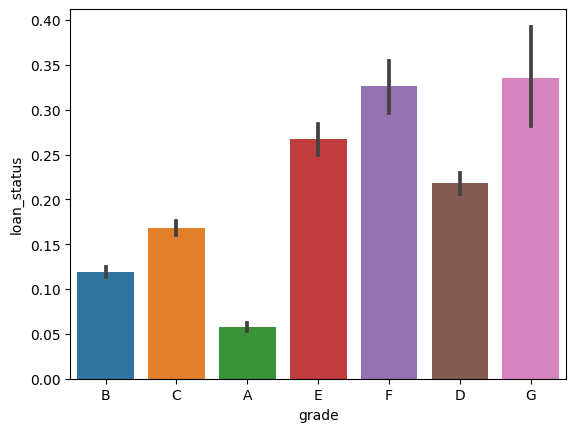

In [66]:
sns.barplot(x='grade', y='loan_status', data=loan_new)
plt.show()

In [67]:
def plot_bar(var):
    sns.barplot(x=var, y='loan_status', data=loan_new)
    plt.show()

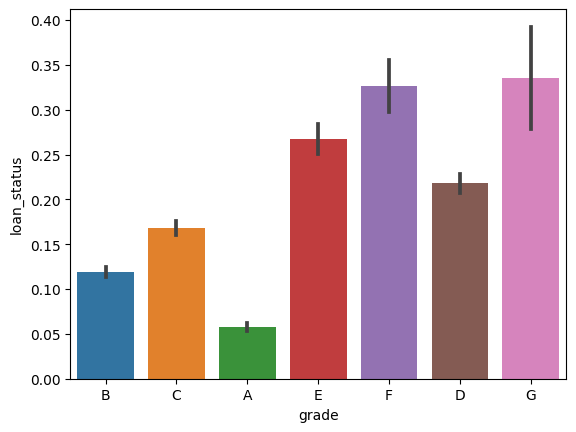

In [68]:
plot_bar('grade')

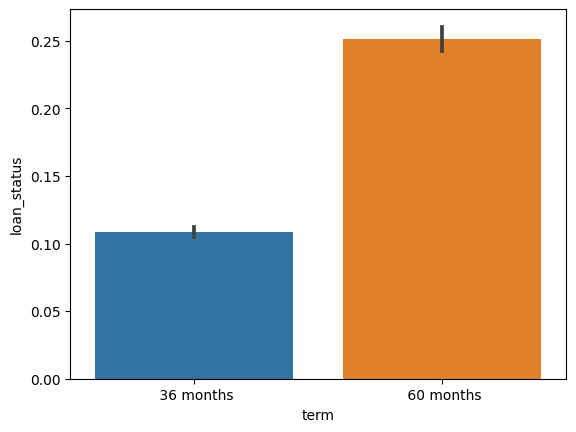

In [69]:
plot_bar('term')

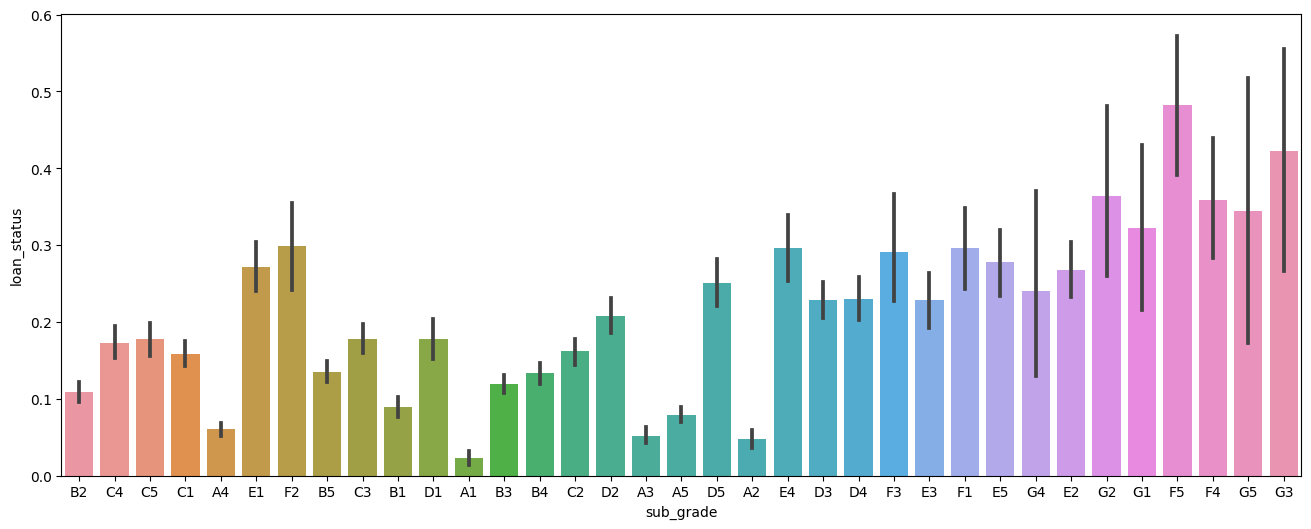

In [71]:
plt.figure(figsize=(16, 6))
plot_bar('sub_grade')

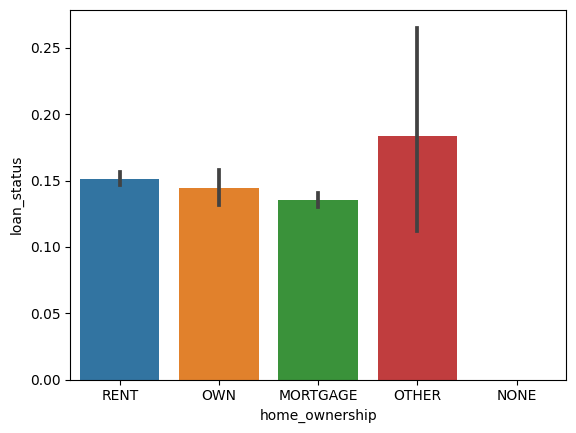

In [72]:
plot_bar('home_ownership')

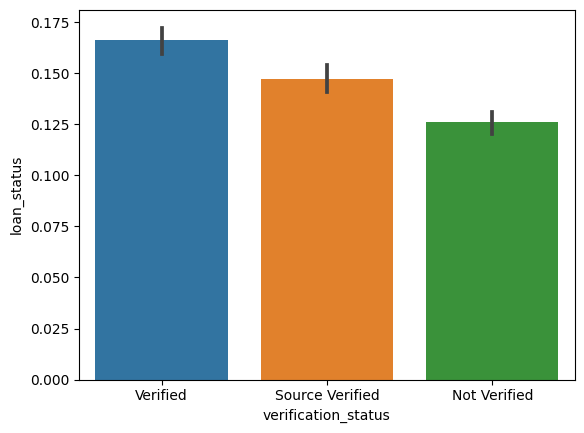

In [73]:
plot_bar('verification_status')

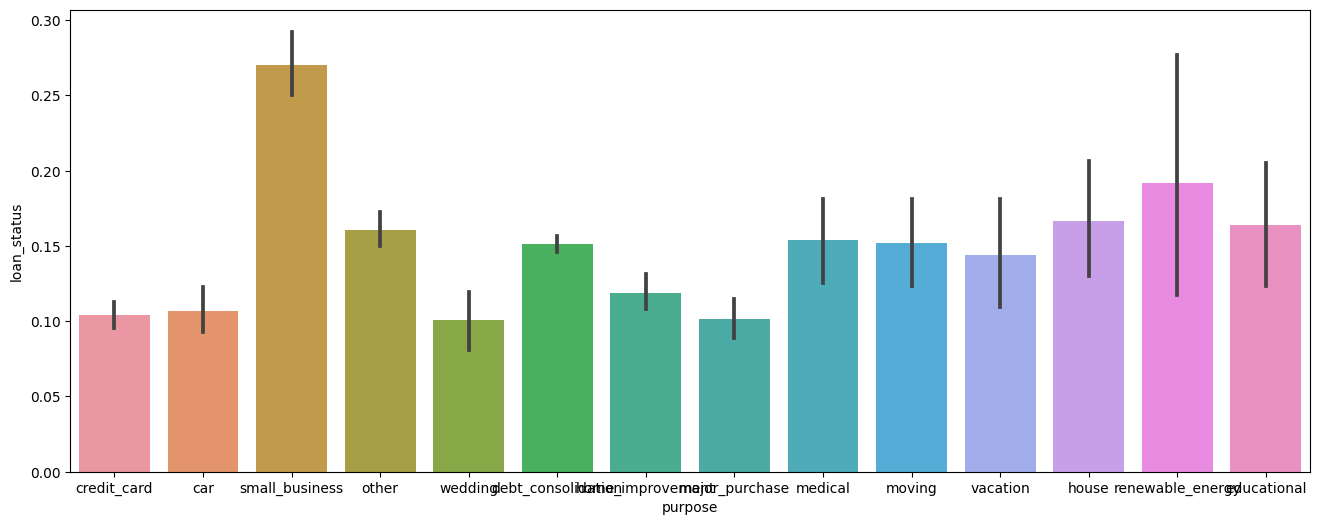

In [75]:
plt.figure(figsize=(16, 6))
plot_bar('purpose')

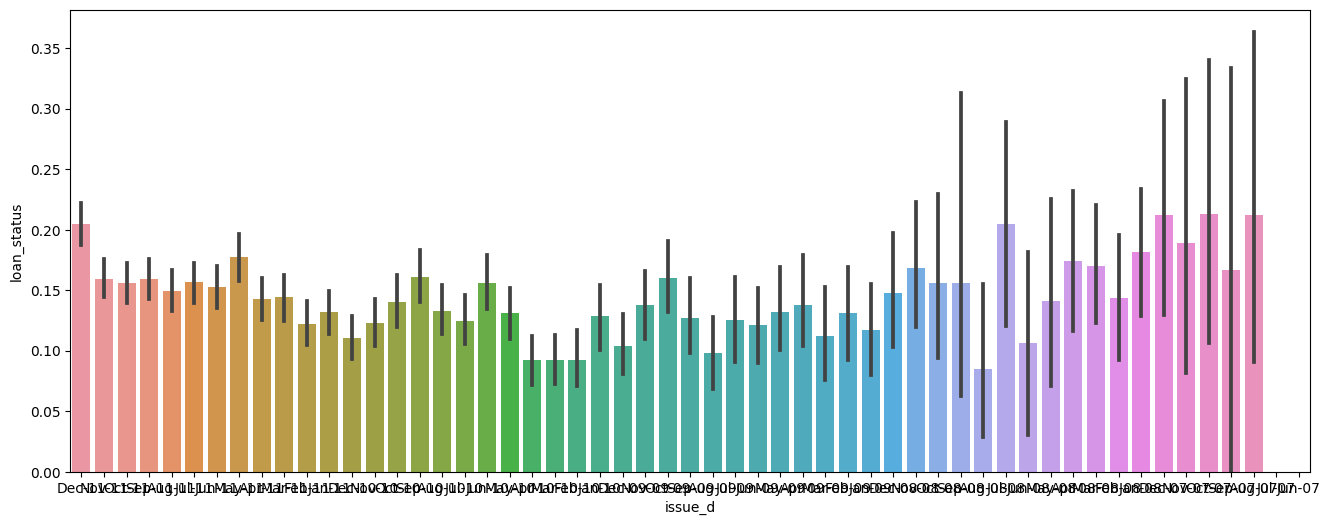

In [77]:
plt.figure(figsize=(16, 6))
plot_bar('issue_d')

In [131]:
from datetime import datetime
loan_new['issue_d'] = loan_new['issue_d'].apply(lambda x: datetime.strptime(x, "%b-%y"))
loan_new.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,[10],RENT,24000.0,Verified,2011-12-01,0,n,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,[1],RENT,30000.0,Source Verified,2011-12-01,1,n,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,[10],RENT,12252.0,Not Verified,2011-12-01,0,n,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,[10],RENT,49200.0,Source Verified,2011-12-01,0,n,other,20.00,f,0.0,1,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,[3],RENT,36000.0,Source Verified,2011-12-01,0,n,wedding,11.20,f,0.0,1,0,0.0,0,0.0,0.0


In [132]:
loan_new['month'] = loan_new['issue_d'].apply(lambda x: x.month)
loan_new['year'] = loan_new['issue_d'].apply(lambda x: x.year)
loan_new.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,month,year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,[10],RENT,24000.0,Verified,2011-12-01,0,n,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,[1],RENT,30000.0,Source Verified,2011-12-01,1,n,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,[10],RENT,12252.0,Not Verified,2011-12-01,0,n,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,[10],RENT,49200.0,Source Verified,2011-12-01,0,n,other,20.00,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,[3],RENT,36000.0,Source Verified,2011-12-01,0,n,wedding,11.20,f,0.0,1,0,0.0,0,0.0,0.0,12,2011


In [82]:
loan_new.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [83]:
loan_new.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

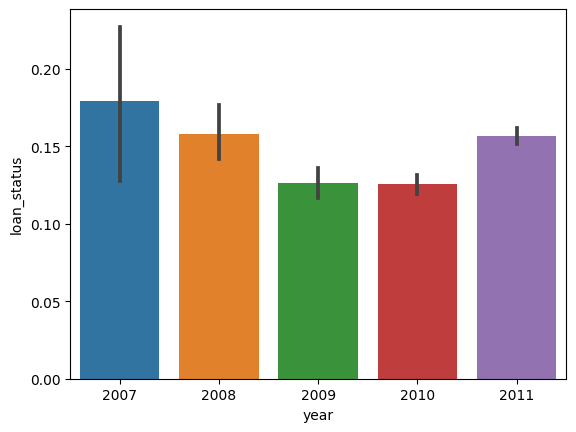

In [85]:
plot_bar('year')

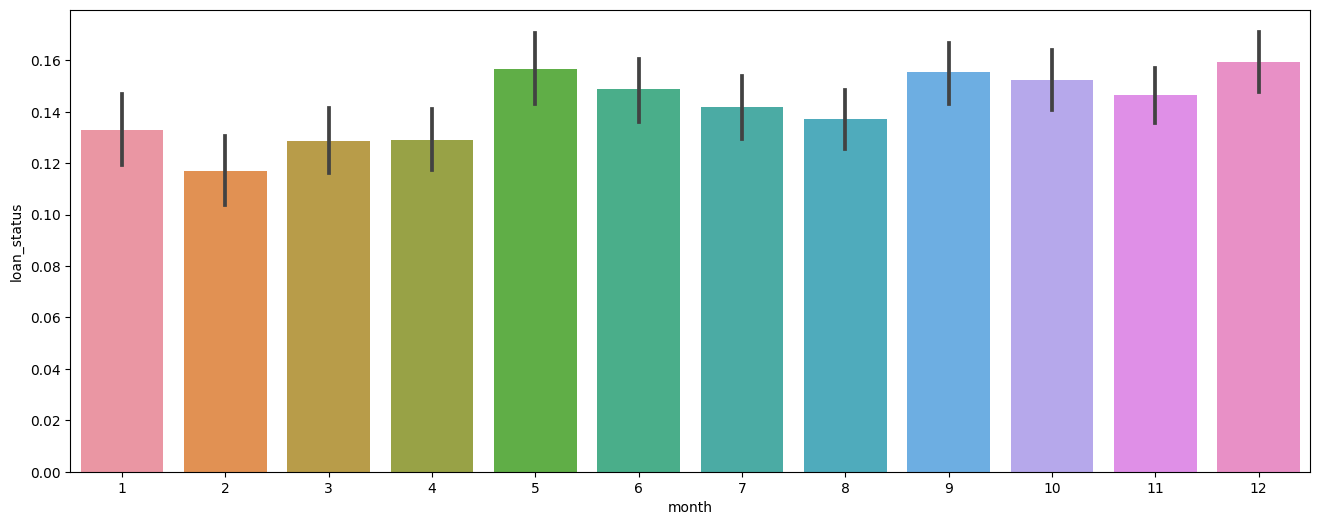

In [86]:
plt.figure(figsize=(16, 6))
plot_bar('month')

In [89]:
loan_new.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,month,year
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,[10],RENT,24000.0,Verified,2011-12-01,0,n,credit_card,27.65,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,[1],RENT,30000.0,Source Verified,2011-12-01,1,n,car,1.00,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,[10],RENT,12252.0,Not Verified,2011-12-01,0,n,small_business,8.72,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,[10],RENT,49200.0,Source Verified,2011-12-01,0,n,other,20.00,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,[3],RENT,36000.0,Source Verified,2011-12-01,0,n,wedding,11.20,f,0.0,1,0,0.0,0,0.0,0.0,12,2011


C:\Users\ramsu\AppData\Local\Temp\ipykernel_14376\2584594455.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_new['loan_amnt'])


<AxesSubplot: xlabel='loan_amnt', ylabel='Density'>

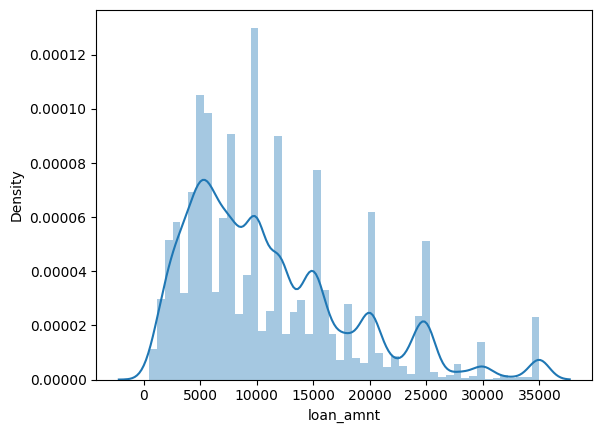

In [90]:
sns.distplot(loan_new['loan_amnt'])

In [138]:
loan_new1 = loan_new.copy()

In [139]:
def loan_bin(n):
    if n<5000:
        return 'low'
    elif n>=5000 and n<15000:
        return 'medium'
    elif n>=15000 and n<25000:
        return 'high'
    else:
        return 'very high'
loan_new1['loan_amnt'] = loan_new1['loan_amnt'].apply(lambda x: loan_bin(x))

In [140]:
loan_new1['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

In [142]:
def plot_bar(var):
    sns.barplot(x=var, y='loan_status', data=loan_new1)
    plt.show()

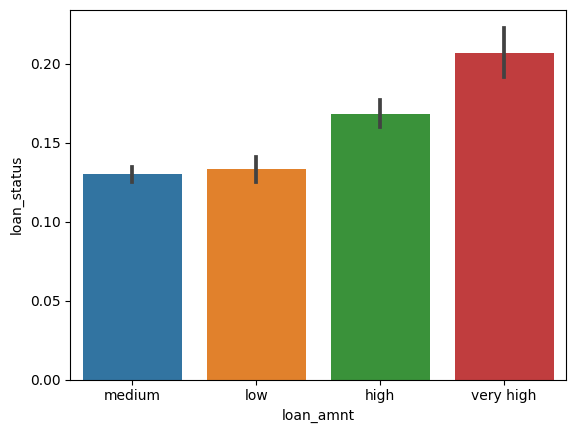

In [143]:
plot_bar('loan_amnt')

In [144]:
loan_new1['funded_amnt_inv'] = loan_new1['funded_amnt_inv'].apply(lambda x: loan_bin(x))

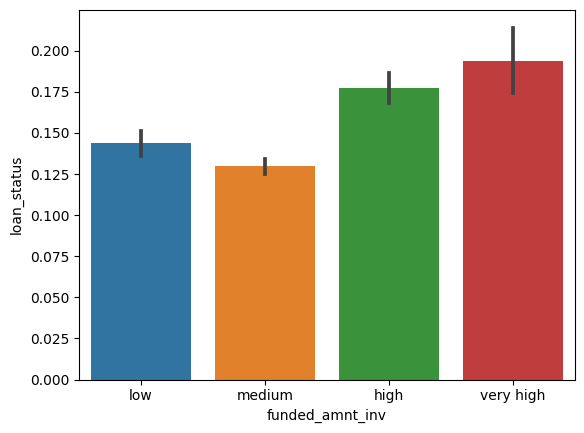

In [145]:
plot_bar('funded_amnt_inv')

In [146]:
loan_new1.int_rate.unique()

array([10.65, 15.27, 15.96, 13.49,  7.9 , 18.64, 21.28, 12.69, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 20.89, 20.3 ,
       23.91, 19.03, 23.13, 22.74, 22.35, 22.06, 24.11,  6.  , 23.52,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49, 15.99,
       16.49,  6.99, 12.99, 15.23, 14.79,  5.42,  8.49, 10.59, 17.49,
       15.62, 19.29, 13.99, 18.39, 16.89, 17.99, 20.99, 22.85, 19.69,
       20.62, 20.25, 21.36, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       22.64, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79, 18.49,
       13.84, 22.94, 24.4 , 21.48, 14.82,  7.29, 17.88, 20.11, 16.02,
       13.43, 14.91, 13.06, 15.28, 15.65, 17.14, 11.11, 10.37, 14.17,
       16.4 , 17.51,  7.66, 10.74,  5.79,  6.92, 10.  ,  9.63, 14.54,
       12.68, 18.62, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22, 19.74,
       20.48,  6.91,

In [147]:
def int_rate(n):
    if n<=10:
        return 'low'
    elif n>10 and n<=15:
        return 'medium'
    else:
        return 'high'
loan_new1['int_rate'] = loan_new1['int_rate'].apply(lambda x: int_rate(x))

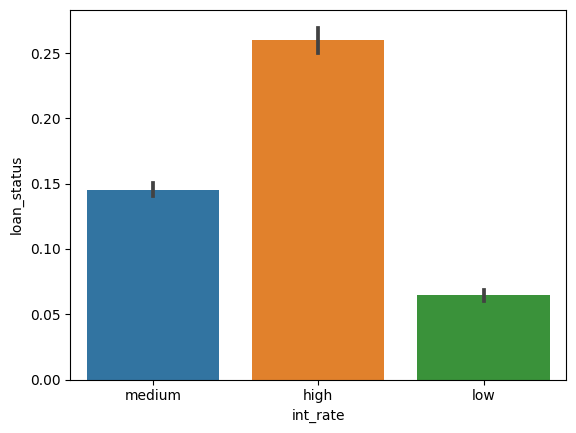

In [148]:
plot_bar('int_rate')

In [149]:
loan_new1.dti.unique()

array([27.65,  1.  ,  8.72, ...,  0.05,  0.12, 25.43])

In [150]:
def dti_rate(n):
    if n<=10:
        return 'low'
    elif n>10 and n<=20:
        return 'medium'
    else:
        return 'high'
loan_new1['dti'] = loan_new1['dti'].apply(lambda x: dti_rate(x))

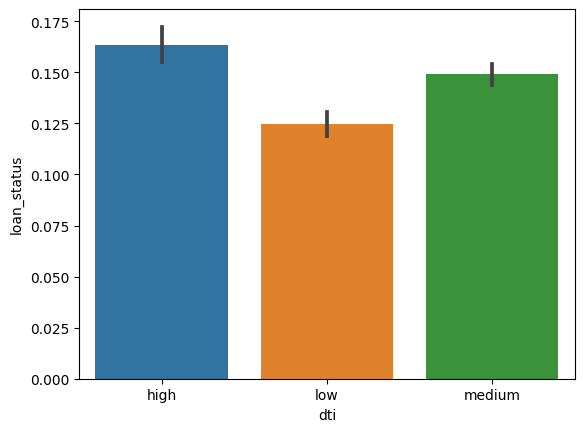

In [151]:
plot_bar('dti')

In [152]:
loan_new1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,month,year
0,1077501,1296599,medium,5000,low,36 months,medium,162.87,B,B2,NaN,[10],RENT,24000.0,Verified,2011-12-01,0,n,credit_card,high,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
1,1077430,1314167,low,2500,low,60 months,high,59.83,C,C4,Ryder,[1],RENT,30000.0,Source Verified,2011-12-01,1,n,car,low,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
2,1077175,1313524,low,2400,low,36 months,high,84.33,C,C5,NaN,[10],RENT,12252.0,Not Verified,2011-12-01,0,n,small_business,low,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
3,1076863,1277178,medium,10000,medium,36 months,medium,339.31,C,C1,AIR RESOURCES BOARD,[10],RENT,49200.0,Source Verified,2011-12-01,0,n,other,medium,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
5,1075269,1311441,medium,5000,medium,36 months,low,156.46,A,A4,Veolia Transportaton,[3],RENT,36000.0,Source Verified,2011-12-01,0,n,wedding,medium,f,0.0,1,0,0.0,0,0.0,0.0,12,2011


In [153]:
loan_new1.funded_amnt.unique()

array([ 5000,  2500,  2400, ...,   800, 13875, 22350], dtype=int64)

In [154]:
def fund_amt_bin(n):
    if n<=5000:
        return 'low'
    elif n>5000 and n<=15000:
        return 'medium'
    else:
        return 'high'
loan_new1['funded_amnt'] = loan_new1['funded_amnt'].apply(lambda x: fund_amt_bin(x))

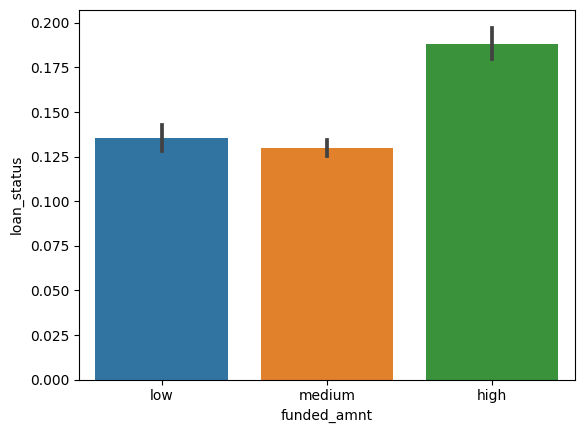

In [155]:
plot_bar('funded_amnt')

In [156]:
loan_new1.installment.unique()

array([162.87,  59.83,  84.33, ...,  78.42, 275.38, 255.43])

C:\Users\ramsu\AppData\Local\Temp\ipykernel_14376\2972332842.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_new1['installment'])


<AxesSubplot: xlabel='installment', ylabel='Density'>

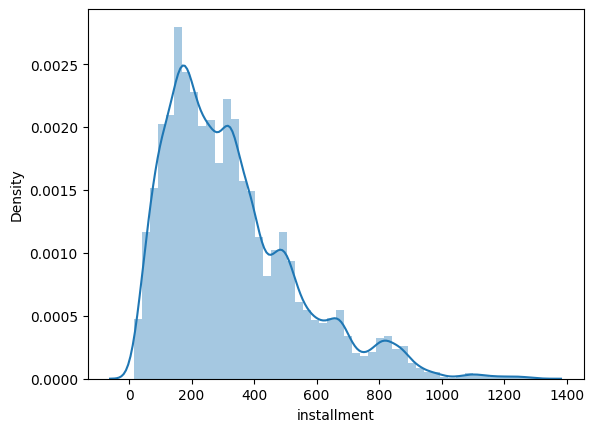

In [157]:
sns.distplot(loan_new1['installment'])

In [159]:
def inst_bin(n):
    if n<=200:
        return 'low'
    elif n>200 and n<=400:
        return 'medium'
    elif n>400 and n<=600:
        return 'high'
    else:
        return 'very high'
loan_new1['installment'] = loan_new1['installment'].apply(lambda x: inst_bin(x))

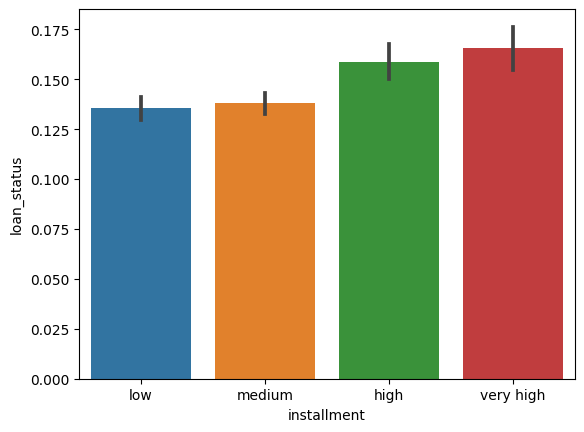

In [160]:
plot_bar('installment')

C:\Users\ramsu\AppData\Local\Temp\ipykernel_14376\4096662540.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_new1['annual_inc'])


<AxesSubplot: xlabel='annual_inc', ylabel='Density'>

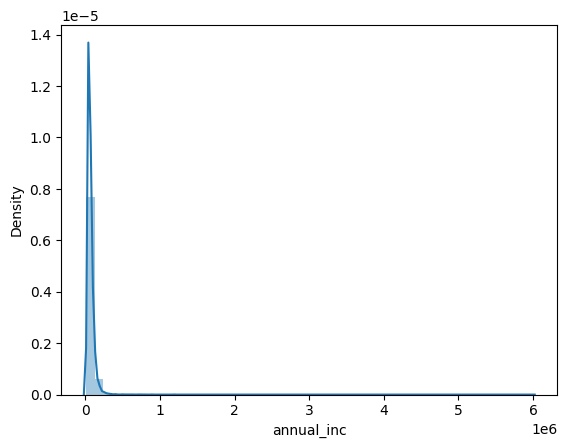

In [168]:
sns.distplot(loan_new1['annual_inc'])

In [173]:
loan_new1['annual_inc'].value_counts()

60000.00      1434
50000.00      1009
40000.00       838
45000.00       794
75000.00       779
30000.00       774
65000.00       771
70000.00       704
48000.00       674
55000.00       627
80000.00       627
36000.00       579
42000.00       577
90000.00       541
100000.00      495
35000.00       494
120000.00      477
85000.00       466
72000.00       460
52000.00       379
24000.00       372
54000.00       351
110000.00      304
95000.00       272
62000.00       258
78000.00       241
38000.00       234
25000.00       230
150000.00      222
32000.00       211
58000.00       209
130000.00      208
96000.00       202
56000.00       200
43000.00       199
125000.00      199
105000.00      195
68000.00       192
66000.00       190
53000.00       187
63000.00       185
57000.00       179
51000.00       178
33000.00       177
84000.00       176
37000.00       170
140000.00      160
47000.00       157
44000.00       156
115000.00      146
46000.00       145
38400.00       144
39000.00    

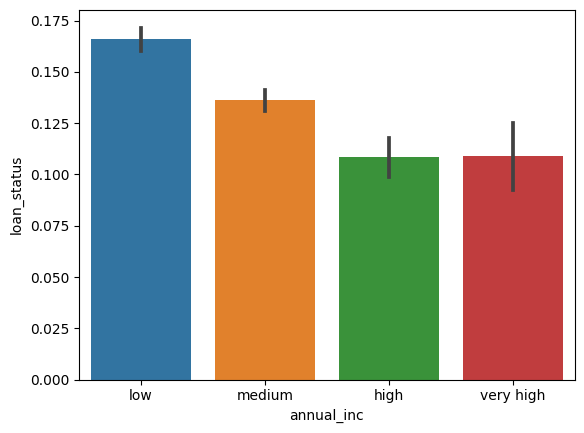

In [174]:
def annual_in_bin(n):
    if n<=50000:
        return 'low'
    elif n>50000 and n<=100000:
        return 'medium'
    elif n>100000 and n<=150000:
        return 'high'
    else:
        return 'very high'
loan_new1['annual_inc'] = loan_new1['annual_inc'].apply(lambda x: annual_in_bin(x))
plot_bar('annual_inc')

In [175]:
loan_new1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,dti,initial_list_status,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,month,year
0,1077501,1296599,medium,low,low,36 months,medium,low,B,B2,NaN,[10],RENT,low,Verified,2011-12-01,0,n,credit_card,high,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
1,1077430,1314167,low,low,low,60 months,high,low,C,C4,Ryder,[1],RENT,low,Source Verified,2011-12-01,1,n,car,low,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
2,1077175,1313524,low,low,low,36 months,high,low,C,C5,NaN,[10],RENT,low,Not Verified,2011-12-01,0,n,small_business,low,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
3,1076863,1277178,medium,medium,medium,36 months,medium,medium,C,C1,AIR RESOURCES BOARD,[10],RENT,low,Source Verified,2011-12-01,0,n,other,medium,f,0.0,1,0,0.0,0,0.0,0.0,12,2011
5,1075269,1311441,medium,low,medium,36 months,low,low,A,A4,Veolia Transportaton,[3],RENT,low,Source Verified,2011-12-01,0,n,wedding,medium,f,0.0,1,0,0.0,0,0.0,0.0,12,2011


C:\Users\ramsu\AppData\Local\Temp\ipykernel_14376\1901565950.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_new1['emp_length'])


<AxesSubplot: xlabel='emp_length', ylabel='Density'>

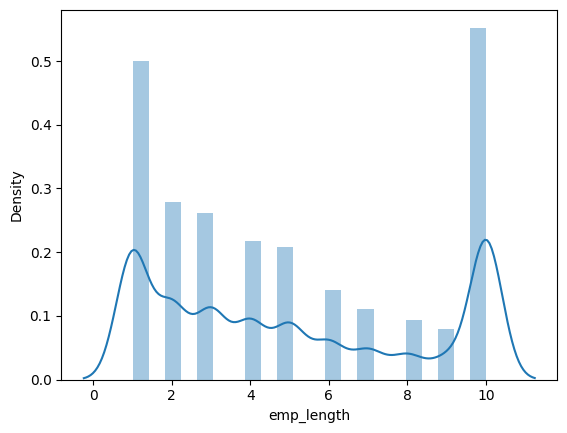

In [176]:
sns.distplot(loan_new1['emp_length'])

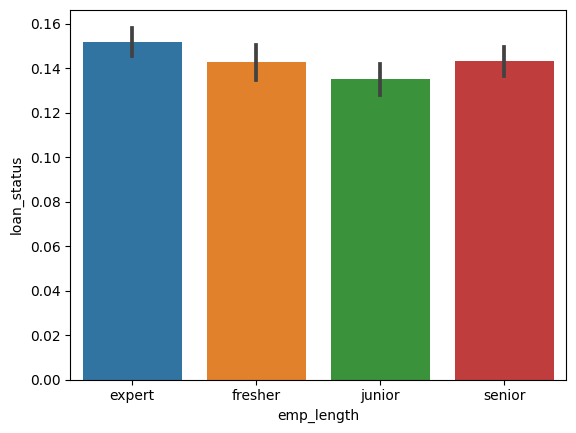

In [177]:
def emp_len_bin(n):
    if n<=1:
        return 'fresher'
    elif n>1 and n<=3:
        return 'junior'
    elif n>3 and n<=7:
        return 'senior'
    else:
        return 'expert'
loan_new1['emp_length'] = loan_new1['emp_length'].apply(lambda x: emp_len_bin(x))
plot_bar('emp_length')

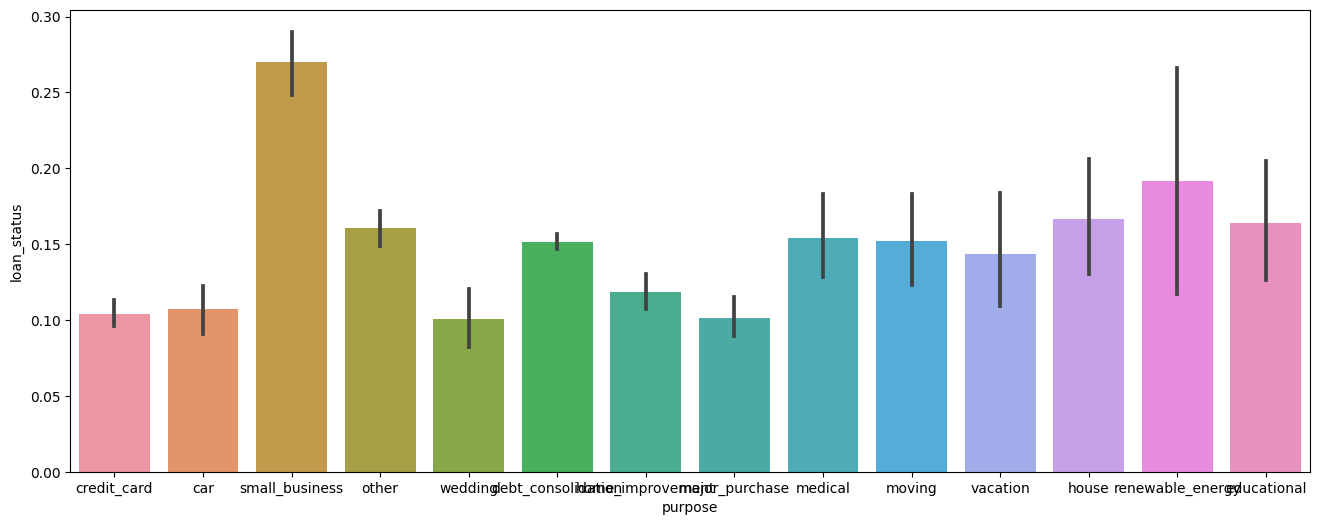

In [178]:
plt.figure(figsize=(16, 6))
plot_bar('purpose')

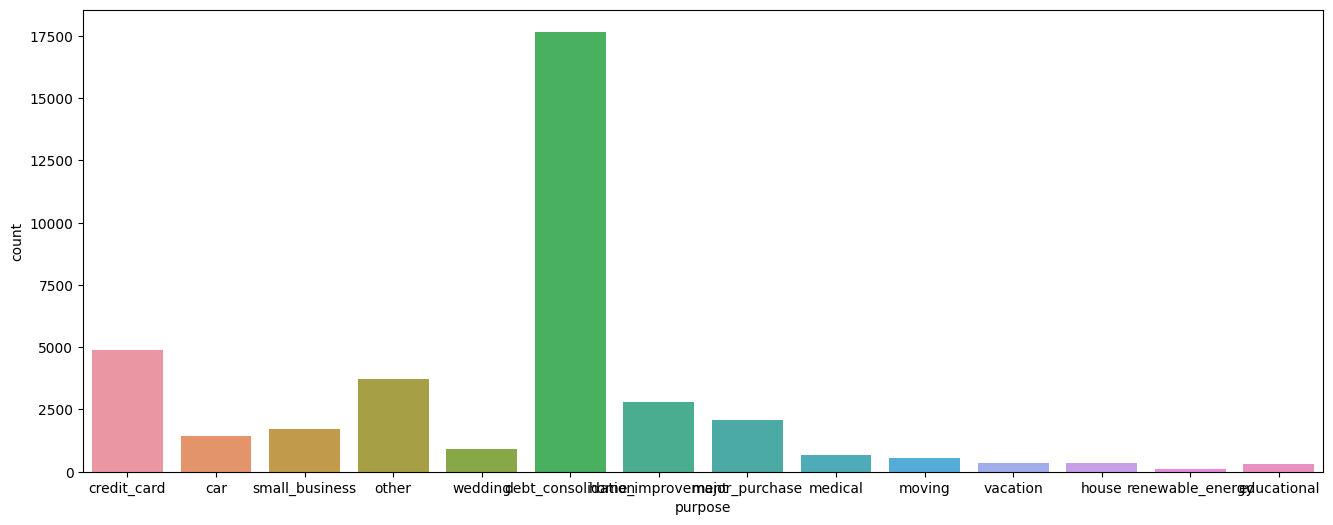

In [180]:
plt.figure(figsize=(16, 6))
sns.countplot(x='purpose', data=loan_new1)
plt.show()

In [182]:
pusposes = ['credit_card','debt_consolidation', 'major_purchase', 'home_improvement']
loan_new2 = loan_new1[loan_new1['purpose'].isin(pusposes)]
loan_new2['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

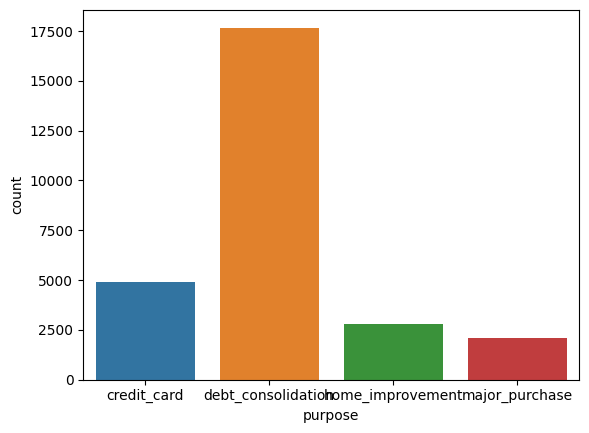

In [183]:
sns.countplot(x=loan_new2['purpose'])
plt.show()

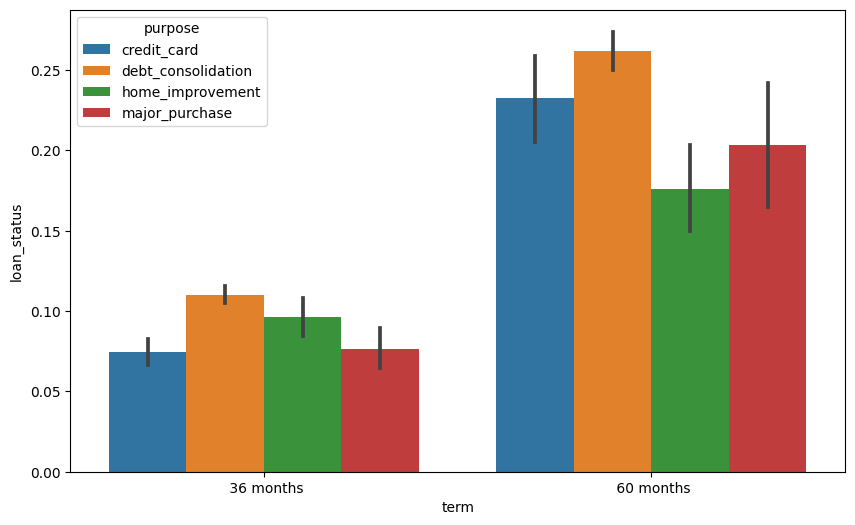

In [184]:
plt.figure(figsize=[10, 6])
sns.barplot(x='term', y='loan_status', hue='purpose', data=loan_new2)
plt.show()

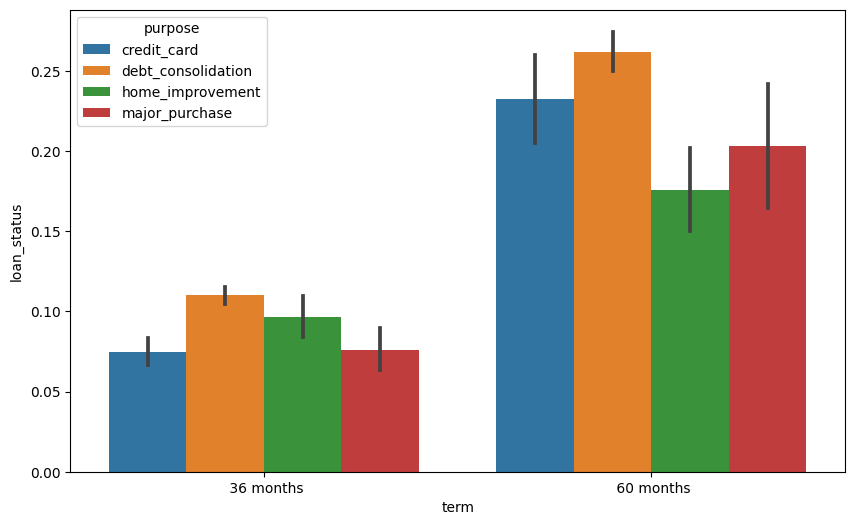

In [186]:
def multi_plot(var):
    plt.figure(figsize=[10, 6])
    sns.barplot(x=var, y='loan_status', hue='purpose', data=loan_new2)
    plt.show()
multi_plot('term')

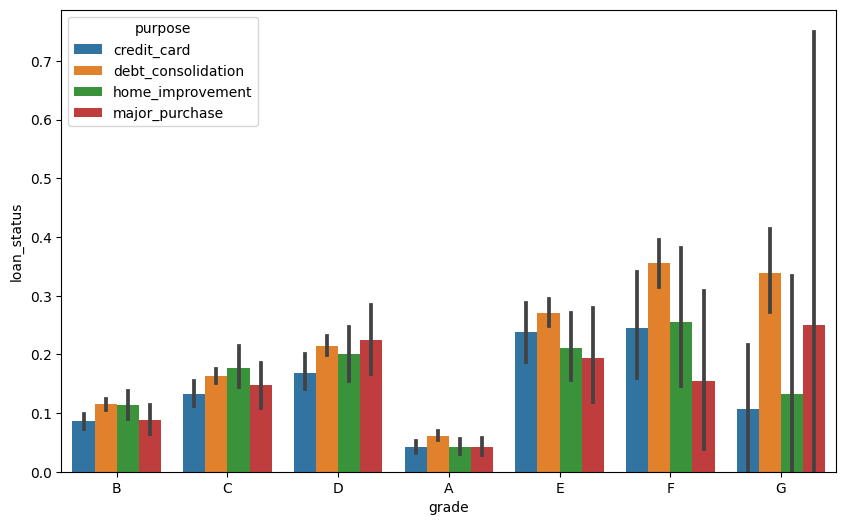

In [188]:
multi_plot('grade')

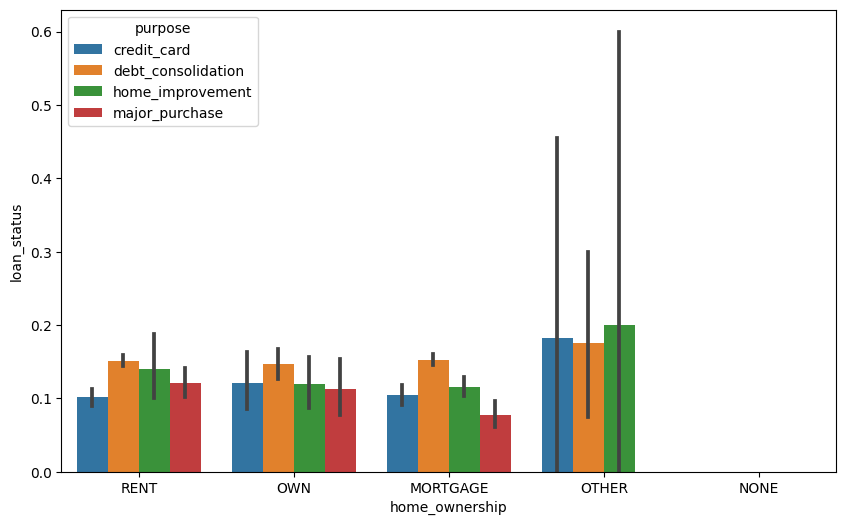

In [189]:
multi_plot('home_ownership')

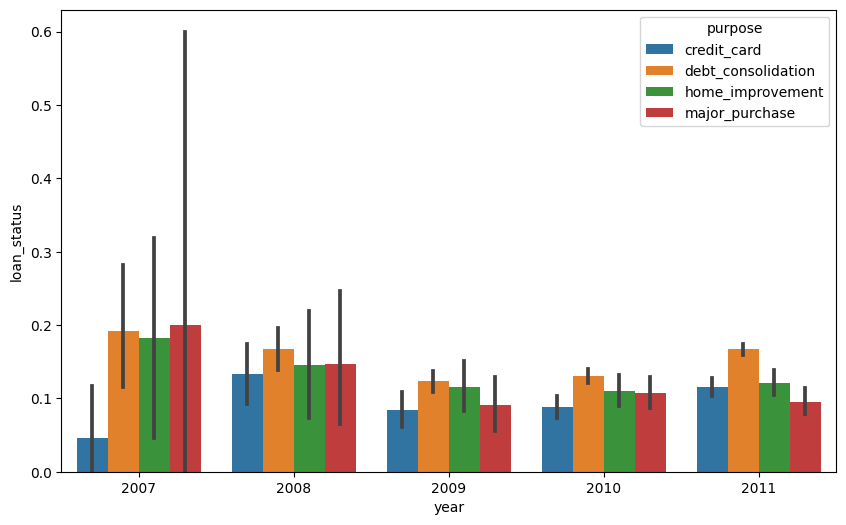

In [190]:
multi_plot('year')

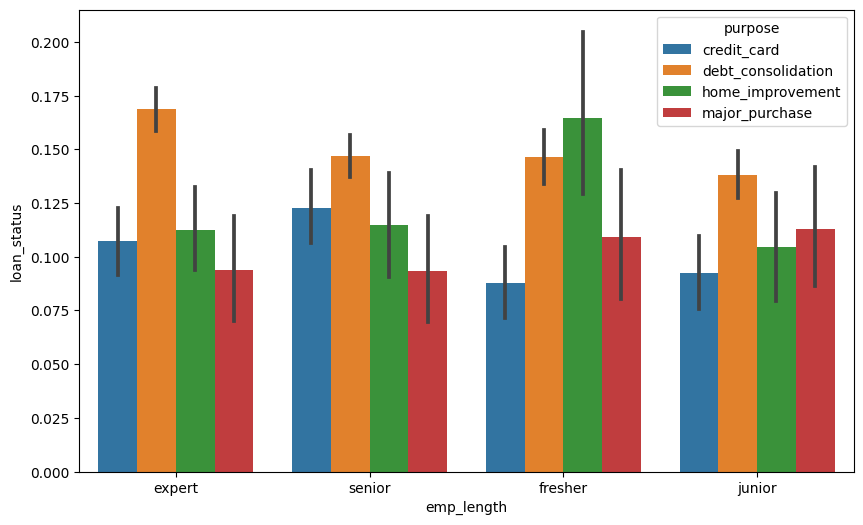

In [191]:
multi_plot('emp_length')

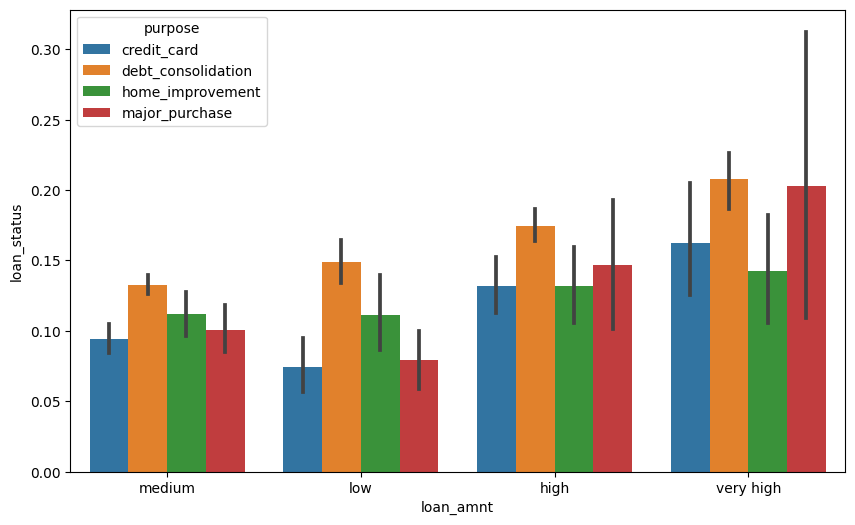

In [192]:
multi_plot('loan_amnt')

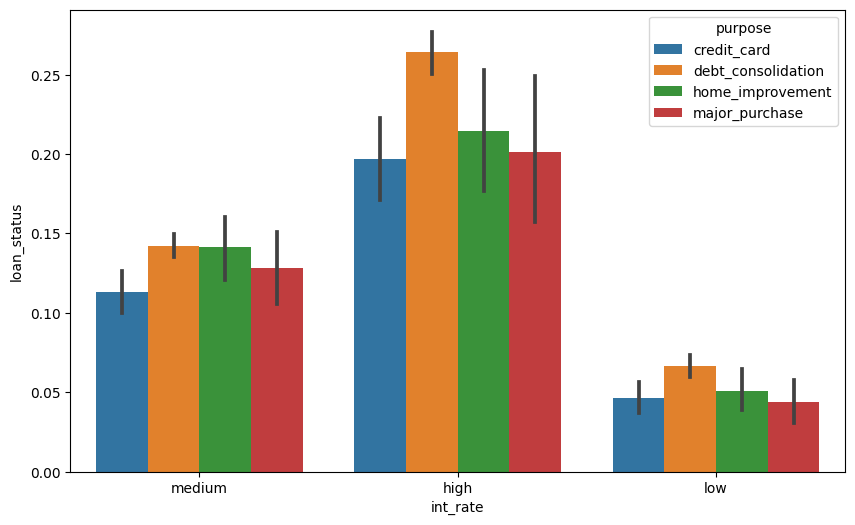

In [193]:
multi_plot('int_rate')

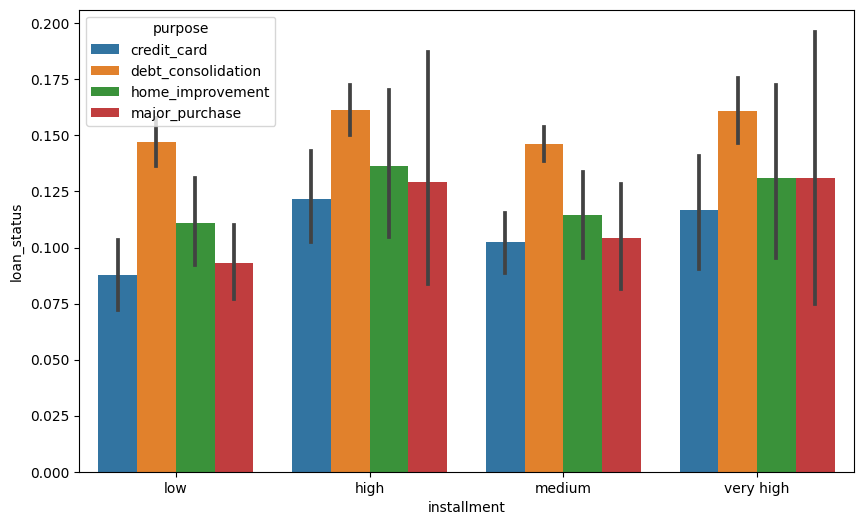

In [194]:
multi_plot('installment')

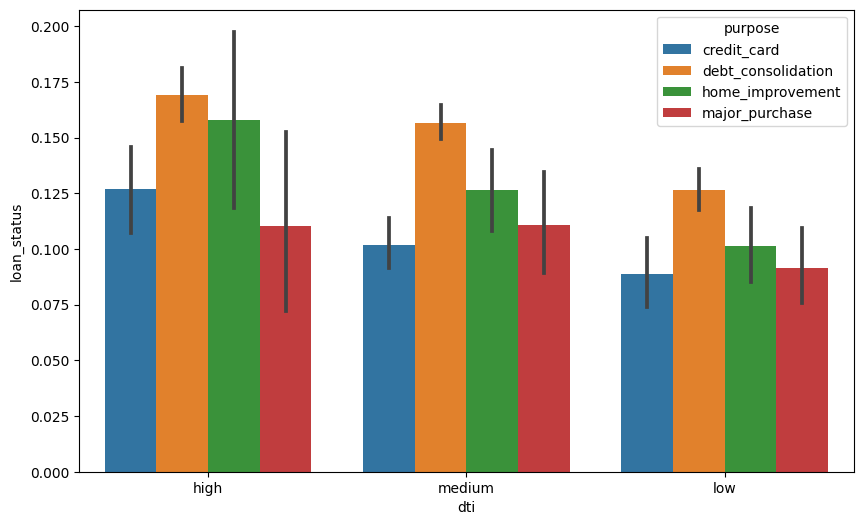

In [195]:
multi_plot('dti')

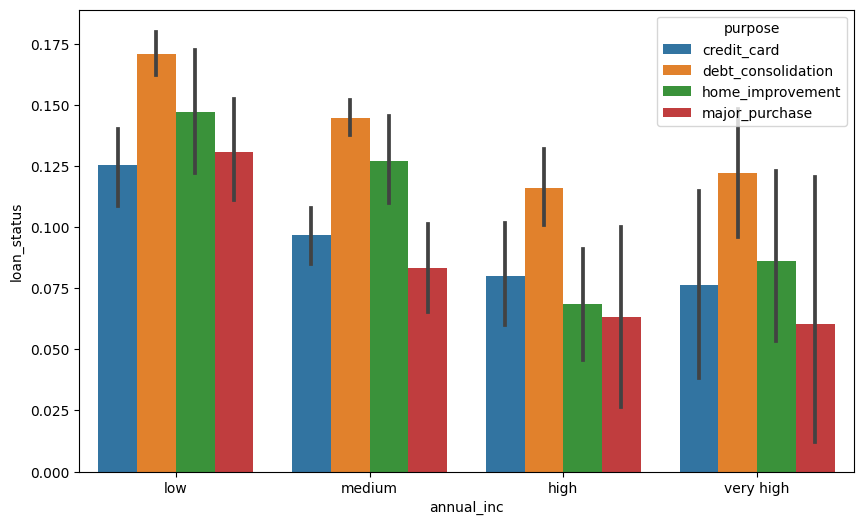

In [196]:
multi_plot('annual_inc')

In [197]:
loan_new2.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

In [199]:
def diff_rate(var):
    def_rate = loan_new2.groupby(var).loan_status.mean().sort_values(ascending=False)
    return (round(def_rate, 2), round(def_rate[0] - def_rate[-1], 2))

In [200]:
def_rate, diff = diff_rate('annual_inc')

In [201]:
print(def_rate)
print(diff)

annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


In [206]:
df_categorical = loan_new2.loc[:, loan_new2.dtypes==object]
df_categorical['loan_status'] = loan_new2['loan_status']

print([i for i in loan_new2.columns])

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'dti', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'month', 'year']


C:\Users\ramsu\AppData\Local\Temp\ipykernel_14376\2858930261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical['loan_status'] = loan_new2['loan_status']


In [207]:
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key!='loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'funded_amnt': 5.0, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 5.0, 'dti': 5.0, 'initial_list_status': 0.0}
